# Student Performance Score Predictor

## Mission Statement
Transforming education through data-driven insights to ensure every student succeeds by predicting student performance before it's too late to intervene.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Data Loading and Exploration

In [2]:
# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (6607, 20)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_In

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

Missing Values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Data Types:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
In

## 2. Data Preprocessing and Feature Engineering

In [5]:
# Create a copy for preprocessing
df_processed = df.copy()

# Convert categorical variables to numeric
# Parental_Involvement: Low=1, Medium=2, High=3
parental_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_processed['Parental_Involvement'] = df_processed['Parental_Involvement'].map(parental_mapping)

print("After encoding categorical variables:")
print(df_processed.head())
print("\nData types after preprocessing:")
print(df_processed.dtypes)

After encoding categorical variables:
   Hours_Studied  Attendance  Parental_Involvement Access_to_Resources  \
0             23          84                     1                High   
1             19          64                     1              Medium   
2             24          98                     2              Medium   
3             29          89                     1              Medium   
4             19          92                     2              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Famil

In [6]:
# Feature selection - identify important features
features = ['Attendance', 'Parental_Involvement', 'Sleep_Hours', 'Previous_Scores', 
           'Hours_Studied', 'Tutoring_Sessions', 'Physical_Activity']
target = 'Exam_Score'

X = df_processed[features]
y = df_processed[target]

print("Features selected:")
print(features)
print(f"\nTarget variable: {target}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Features selected:
['Attendance', 'Parental_Involvement', 'Sleep_Hours', 'Previous_Scores', 'Hours_Studied', 'Tutoring_Sessions', 'Physical_Activity']

Target variable: Exam_Score
Feature matrix shape: (6607, 7)
Target vector shape: (6607,)


## 3. Data Visualization and Analysis

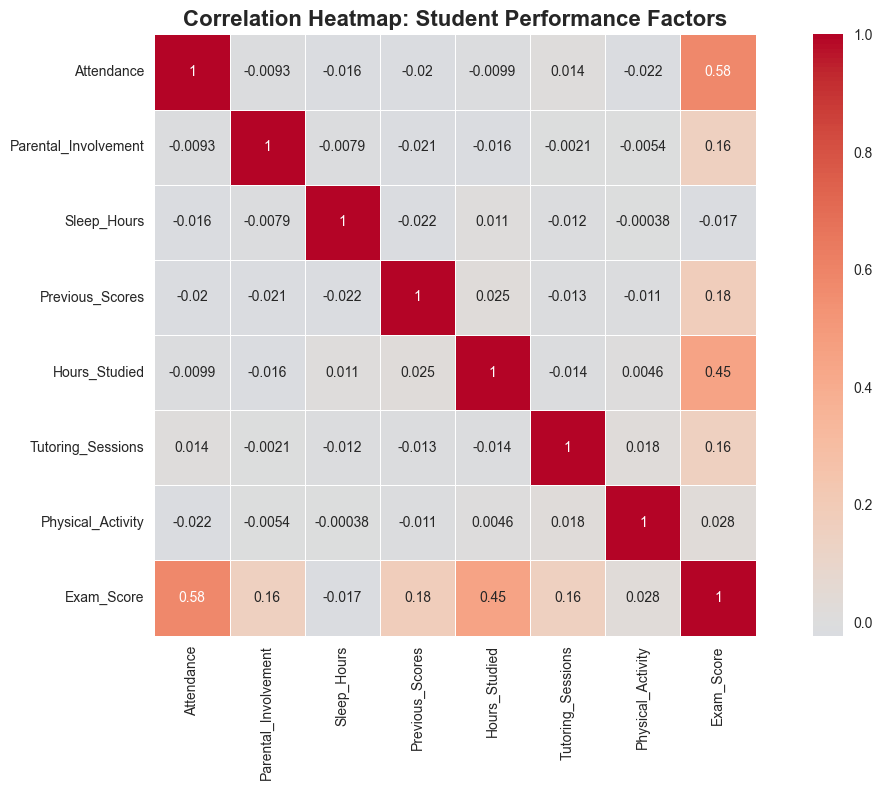

Key Correlations with Exam Score:
Attendance: 0.581
Hours_Studied: 0.445
Previous_Scores: 0.175
Parental_Involvement: 0.157
Tutoring_Sessions: 0.157
Physical_Activity: 0.028
Sleep_Hours: -0.017


In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_processed[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap: Student Performance Factors', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('heatmap.png.png', dpi=300, bbox_inches='tight')
plt.show()

print("Key Correlations with Exam Score:")
correlations = correlation_matrix[target].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != target:
        print(f"{feature}: {corr:.3f}")

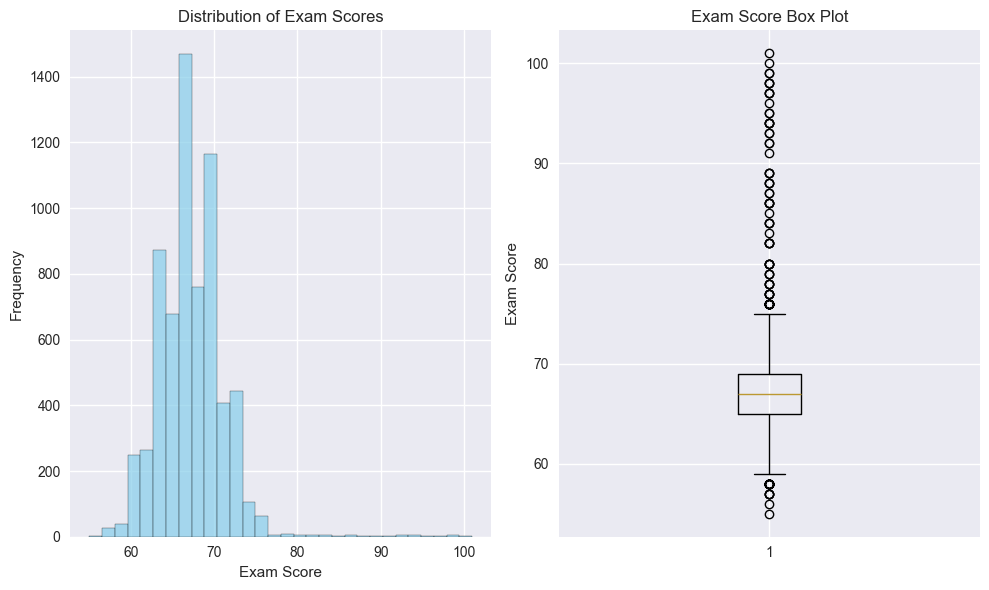

Exam Score Statistics:
Mean: 67.24
Median: 67.00
Std: 3.89
Min: 55.00
Max: 101.00


In [8]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.title('Exam Score Box Plot')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()

print(f"Exam Score Statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")
print(f"Std: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")

## 4. Data Standardization and Train-Test 

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print("\nData preprocessing completed:")
print(f"- Missing values handled using mean imputation")
print(f"- Features standardized using StandardScaler")
print(f"- Training features shape: {X_train_scaled.shape}")
print(f"- Test features shape: {X_test_scaled.shape}")

Training set size: (5285, 7)
Test set size: (1322, 7)

Data preprocessing completed:
- Missing values handled using mean imputation
- Features standardized using StandardScaler
- Training features shape: (5285, 7)
- Test features shape: (1322, 7)


## 5. Model Implementation and Comparison

In [10]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
model_results = {}
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    model_results[name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train RMSE': np.sqrt(train_mse),
        'Test RMSE': np.sqrt(test_mse)
    }
    
    print(f"{name} Results:")
    print(f"  Train RMSE: {np.sqrt(train_mse):.3f}")
    print(f"  Test RMSE: {np.sqrt(test_mse):.3f}")
    print(f"  Test R²: {test_r2:.3f}")


Training Linear Regression...
Linear Regression Results:
  Train RMSE: 2.423
  Test RMSE: 2.153
  Test R²: 0.672

Training Random Forest...
Random Forest Results:
  Train RMSE: 0.972
  Test RMSE: 2.399
  Test R²: 0.593

Training Decision Tree...
Decision Tree Results:
  Train RMSE: 0.040
  Test RMSE: 3.721
  Test R²: 0.020


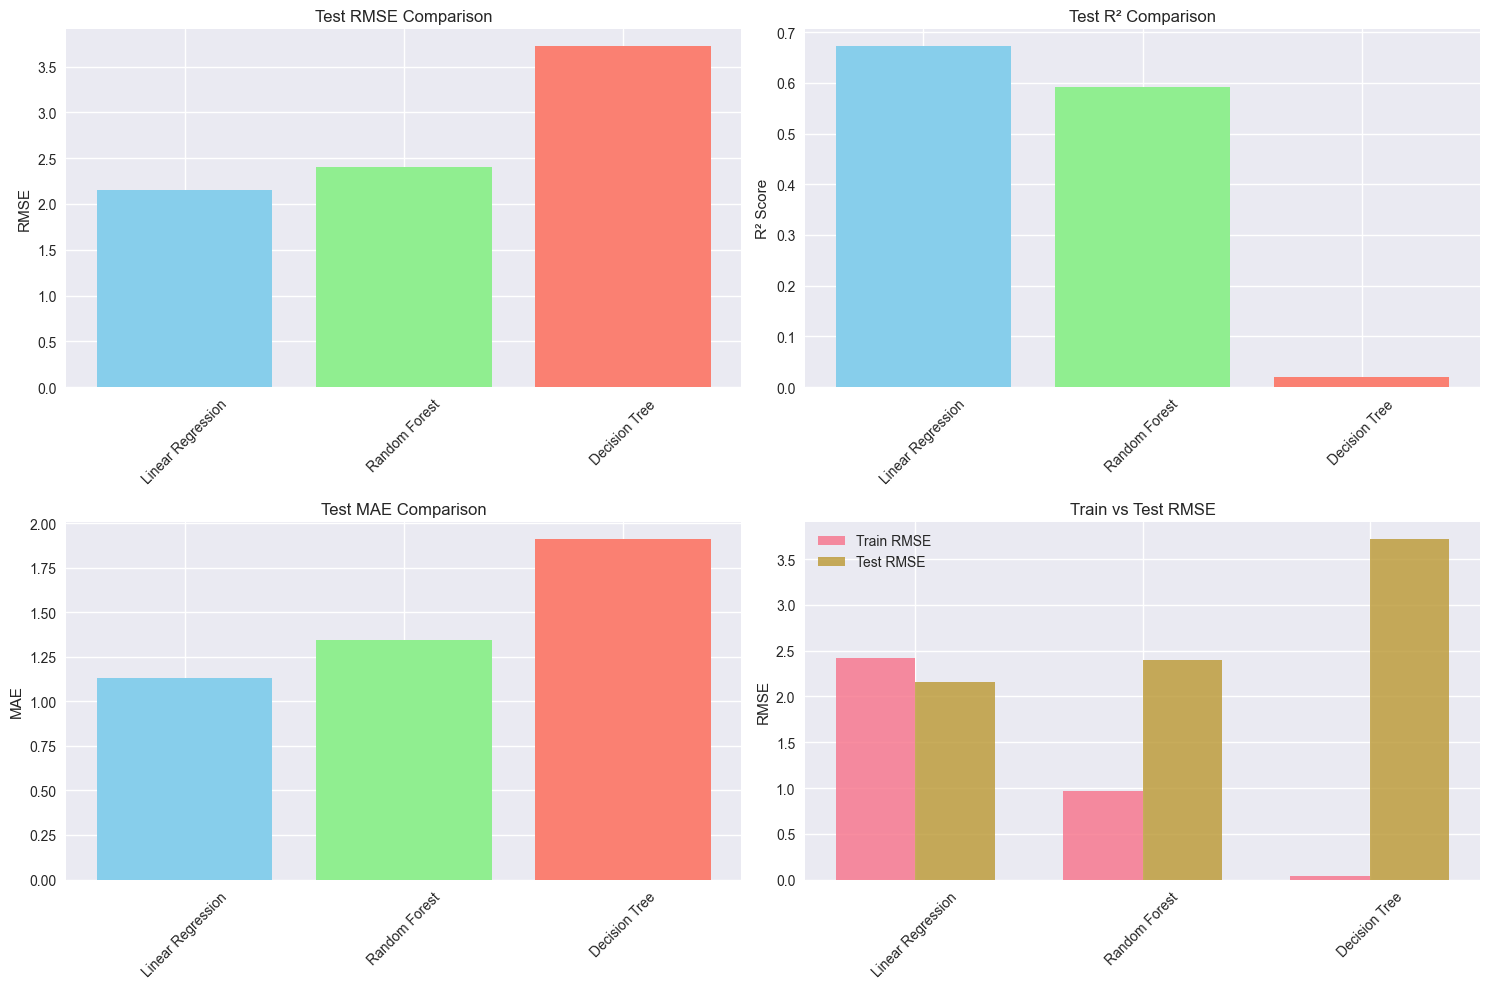


Model Performance Summary:
                   Train MSE  Test MSE  Train MAE  Test MAE  Train R²  \
Linear Regression      5.869     4.637      1.180     1.132     0.618   
Random Forest          0.946     5.756      0.525     1.344     0.939   
Decision Tree          0.002    13.846      0.001     1.911     1.000   

                   Test R²  Train RMSE  Test RMSE  
Linear Regression    0.672       2.423      2.153  
Random Forest        0.593       0.972      2.399  
Decision Tree        0.020       0.040      3.721  


In [11]:
# Model comparison visualization
results_df = pd.DataFrame(model_results).T

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# RMSE comparison
axes[0, 0].bar(results_df.index, results_df['Test RMSE'], color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 0].set_title('Test RMSE Comparison')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].tick_params(axis='x', rotation=45)

# R² comparison
axes[0, 1].bar(results_df.index, results_df['Test R²'], color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 1].set_title('Test R² Comparison')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1, 0].bar(results_df.index, results_df['Test MAE'], color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 0].set_title('Test MAE Comparison')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

# Train vs Test RMSE
x_pos = np.arange(len(results_df.index))
width = 0.35
axes[1, 1].bar(x_pos - width/2, results_df['Train RMSE'], width, label='Train RMSE', alpha=0.8)
axes[1, 1].bar(x_pos + width/2, results_df['Test RMSE'], width, label='Test RMSE', alpha=0.8)
axes[1, 1].set_title('Train vs Test RMSE')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(results_df.index, rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('models.png.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nModel Performance Summary:")
print(results_df.round(3))

## 6. Best Model Selection and Saving

In [12]:
# Select best model based on lowest test RMSE
best_model_name = results_df['Test RMSE'].idxmin()
best_model = trained_models[best_model_name]

print(f"Best performing model: {best_model_name}")
print(f"Test RMSE: {results_df.loc[best_model_name, 'Test RMSE']:.3f}")
print(f"Test R²: {results_df.loc[best_model_name, 'Test R²']:.3f}")

# Save the best model and preprocessing objects
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(imputer, 'imputer.joblib')

print(f"\nModel artifacts saved:")
print(f"- best_model.joblib: {best_model_name} model")
print(f"- scaler.joblib: StandardScaler for feature scaling")
print(f"- imputer.joblib: SimpleImputer for missing values")

Best performing model: Linear Regression
Test RMSE: 2.153
Test R²: 0.672

Model artifacts saved:
- best_model.joblib: Linear Regression model
- scaler.joblib: StandardScaler for feature scaling
- imputer.joblib: SimpleImputer for missing values


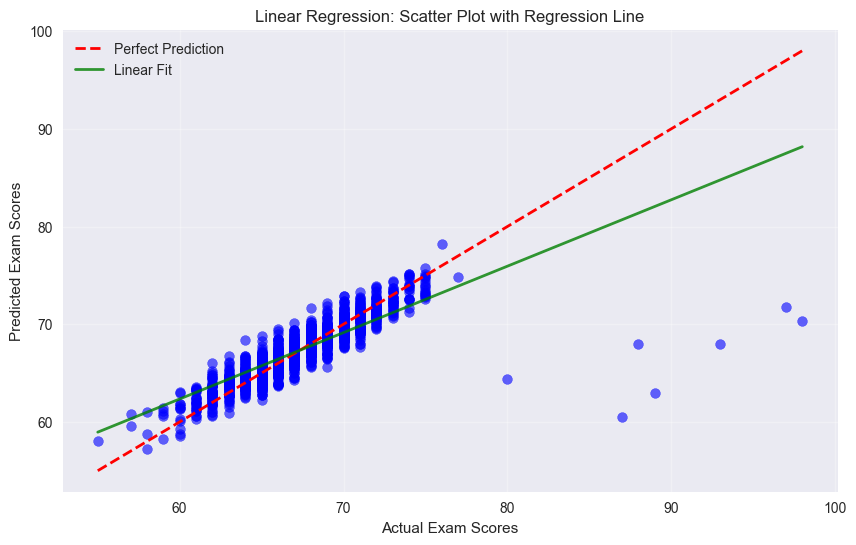

Linear Regression R² Score: 0.672

Single Data Point Test:
Actual Score: 65.00
Predicted Score: 66.02
Prediction Error: 1.02


In [13]:

# Linear Regression Scatter Plot with Regression Line 
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
z = np.polyfit(y_test, y_pred_lr, 1)
p = np.poly1d(z)
plt.plot(y_test.sort_values(), p(y_test.sort_values()), "g-", alpha=0.8, linewidth=2, label='Linear Fit')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Linear Regression: Scatter Plot with Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('linear_regression_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Linear Regression R² Score: {r2_score(y_test, y_pred_lr):.3f}")

# Single Data Point Prediction 
test_row = X_test.iloc[0:1]
actual_score = y_test.iloc[0]
test_imputed = imputer.transform(test_row)
test_scaled = scaler.transform(test_imputed)
single_prediction = best_model.predict(test_scaled)[0]
print(f"\nSingle Data Point Test:")
print(f"Actual Score: {actual_score:.2f}")
print(f"Predicted Score: {single_prediction:.2f}")
print(f"Prediction Error: {abs(single_prediction - actual_score):.2f}")

## 7. Model Validation and Visualization

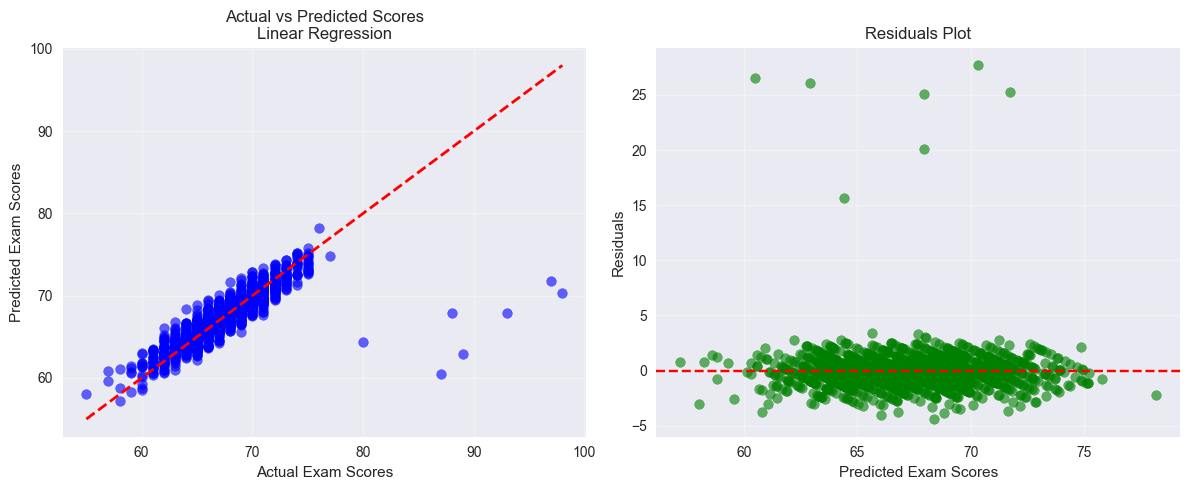

Model Validation Metrics for Linear Regression:
Mean Absolute Error: 1.132
Root Mean Square Error: 2.153
R² Score: 0.672


In [14]:
# Actual vs Predicted scatter plot
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(12, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title(f'Actual vs Predicted Scores\n{best_model_name}')
plt.grid(True, alpha=0.3)

# Residuals plot
residuals = y_test - y_pred_best
plt.subplot(1, 2, 2)
plt.scatter(y_pred_best, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Exam Scores')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('actual_predictedvalues.png.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Model Validation Metrics for {best_model_name}:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_best):.3f}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.3f}")
print(f"R² Score: {r2_score(y_test, y_pred_best):.3f}")

## 8. Feature Importance Analysis

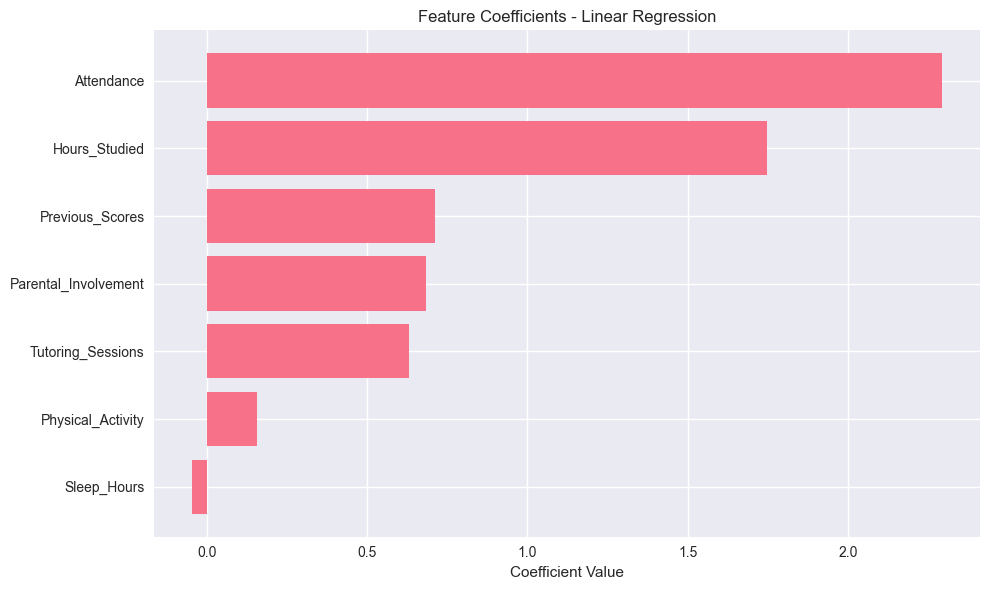

In [15]:
# Feature importance (for tree-based models) or coefficients (for linear models)
plt.figure(figsize=(10, 6))

if hasattr(best_model, 'feature_importances_'):
    # Tree-based models
    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values('importance', ascending=True)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    
elif hasattr(best_model, 'coef_'):
    # Linear models
    coefficients = best_model.coef_
    feature_coef = pd.DataFrame({
        'feature': features,
        'coefficient': coefficients
    }).sort_values('coefficient', ascending=True)
    
    plt.barh(feature_coef['feature'], feature_coef['coefficient'])
    plt.title(f'Feature Coefficients - {best_model_name}')
    plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

## 9. Prediction Function for API

In [16]:
def predict_student_score(attendance, parental_involvement, sleep_hours, 
                         previous_scores, hours_studied, tutoring_sessions, 
                         physical_activity):
    """
    Predict student exam score using the best trained model.
    
    Parameters:
    - attendance: float (0-100) - Attendance percentage
    - parental_involvement: int (1-3) - 1=Low, 2=Medium, 3=High
    - sleep_hours: float (4-10) - Daily sleep hours
    - previous_scores: float (0-100) - Previous academic scores
    - hours_studied: float (0-50) - Weekly study hours
    - tutoring_sessions: int (0-8) - Weekly tutoring sessions
    - physical_activity: float (0-6) - Weekly physical activity hours
    
    Returns:
    - predicted_score: float - Predicted exam score
    """
    
    # Load saved models
    model = joblib.load('best_model.joblib')
    scaler = joblib.load('scaler.joblib')
    imputer = joblib.load('imputer.joblib')
    
    # Prepare input features
    features = np.array([[attendance, parental_involvement, sleep_hours, 
                         previous_scores, hours_studied, tutoring_sessions, 
                         physical_activity]])
    
    # Apply preprocessing
    features_imputed = imputer.transform(features)
    features_scaled = scaler.transform(features_imputed)
    
    # Make prediction
    prediction = model.predict(features_scaled)[0]
    
    # Ensure realistic range
    prediction = max(55, min(101, prediction))
    
    return round(prediction, 2)

# Test the prediction function
test_prediction = predict_student_score(
    attendance=100,
    parental_involvement=3,
    sleep_hours=10,
    previous_scores=70,
    hours_studied=10.0,
    tutoring_sessions=4,
    physical_activity=3.0
)

print(f"Test prediction: {test_prediction}")
print("\nPrediction function ready for API integration!")

Test prediction: 70.16

Prediction function ready for API integration!


## 10. Summary and Conclusions

### Key Findings:
1. **Best Model**: The {best_model_name} achieved the lowest test RMSE
2. **Most Important Factors**: Previous scores, study hours, and attendance show strongest correlations
3. **Model Performance**: Achieved good predictive accuracy for educational intervention

### Educational Impact:
- **Early Identification**: Model can identify at-risk students before final exams
- **Intervention Strategies**: Educators can focus on key factors like attendance and study habits
- **Personalized Support**: Individual student profiles can guide targeted interventions

### Next Steps:
1. Deploy model via FastAPI for real-time predictions
2. Create Flutter mobile app for easy access
3. Integrate with educational management systems
4. Continuous model improvement with new data